In [1]:
import numpy as np
import skimage.io as sk
import TemporelStability as TS
import matplotlib.pyplot as plt
import cv2
import tools
import time

In [2]:
##############################################################################################################
# load the images on a single array
# The shape of array is in the following: (nb images, rows, cols, bands if multibands)
##############################################################################################################
frames = tools.readSTIS("SITS", extension=".tif", index="NDVI")
print("Shape of frames: ", frames.shape)

# Permute the axis in order to put the temporal axis in last position
if frames.ndim == 4:
    frames = frames.transpose((1,2,3,0))
else:
    frames = frames.transpose((1,2,0))


Nbr Fichers  50
Shape of frames:  (50, 400, 400)


In [3]:
##############################################################################################################
# Initilize the Temporal Stability class
# Initilize a date vector that can be a range of number of frames or the day position in a year (i.e 1st jan is in position 1)
##############################################################################################################
st = TS.TemporelStability_Glouton(n_clusters=4, miniBtach=False)
date_vec = np.arange(frames.shape[0])

In [4]:
print("Quantification ")
t0 = time.time()
st.fit(frames)
print("fin de la quantification; temps d'execution est ", time.time() - t0)

Quantification 
400 400 1 50
discrize all points 
X shape  (400, 400, 50)
features shape  (8000000, 1)
[[0.57804114]
 [0.16781976]
 [0.79768481]
 [0.36918221]]
fin de la quantification; temps d'execution est  41.52447581291199


In [5]:
print("Compute the Temporal stability with the strict equality")
t0 = time.time()
ts = st.get_TS(date_vec)
print("End of computation after ", time.time() - t0)

print("Compute the Temporal stability with the relaxed equality on temporal domain")
t0 = time.time()
ts_t = st.get_TS_t(date_vec)
print("End of computation after ", time.time() - t0)

print("Compute the Temporal stability with the relaxed equality on spatial domain")
t0 = time.time()
ts_s = st.get_TS_s(date_vec)
print("End of computation after ", time.time() - t0)

print("Compute the Temporal stability with the relaxed equality on spatio-temporal domain")
t0 = time.time()
ts_st = st.get_TS_st(date_vec)
print("End of computation after ", time.time() - t0)

Compute the Temporal stability with the strict equality
End of computation after  0.6307530403137207
Compute the Temporal stability with the relaxed equality on temporal domain
End of computation after  0.8969988822937012
Compute the Temporal stability with the relaxed equality on spatial domain
End of computation after  9.374002695083618
Compute the Temporal stability with the relaxed equality on spatio-temporal domain
End of computation after  8.895498037338257


In [6]:
#  Normalization of the extracted features to visualization
ts = (ts - np.min(ts, axis=(0,1))) / (np.max(ts, axis=(0,1)) - np.min(ts, axis=(0,1)))
ts_t = (ts_t - np.min(ts_t, axis=(0,1))) / (np.max(ts_t, axis=(0,1)) - np.min(ts_t, axis=(0,1)))
ts_s = (ts_s - np.min(ts_s, axis=(0,1))) / (np.max(ts_s, axis=(0,1)) - np.min(ts_s, axis=(0,1)))
ts_st = (ts_st - np.min(ts_st, axis=(0,1))) / (np.max(ts_st, axis=(0,1)) - np.min(ts_st, axis=(0,1)))

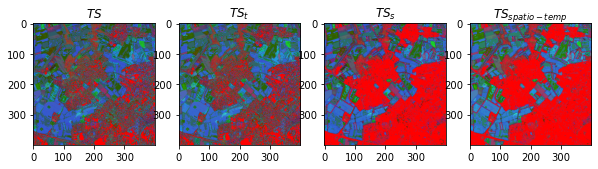

In [7]:
#  TS visualization
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(ts)
plt.title("$TS$")

plt.subplot(1, 4, 2)
plt.imshow(ts_t)
plt.title("$TS_t$")

plt.subplot(1, 4, 3)
plt.imshow(ts_s)
plt.title("$TS_s$")

plt.subplot(1, 4, 4)
plt.imshow(ts_st)
plt.title("$TS_{spatio-temp}$")

plt.show()